In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Shubham Petkar\Desktop\ExelR Lec\Project\Diwali Sales Data.csv",encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Status,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,NaN,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,NaN,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,NaN,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,NaN,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,NaN,2,23877.0


In [3]:
df.shape

(11251, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Status            0 non-null      float64
 12  Orders            11251 non-null  int64  
 13  Amount            11239 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 1.2+ MB


In [5]:
# Drop Blank / unused column
df.drop(['Status'],axis=1, inplace=True)

In [6]:
# Check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# Drop null value
df.dropna(inplace=True)

In [8]:
# Change Data type

df['Amount']=df['Amount'].astype('int64')

In [9]:
#Description of data in dataframe like( mean, median, mode, std)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [10]:
# Discription of numeric columns

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

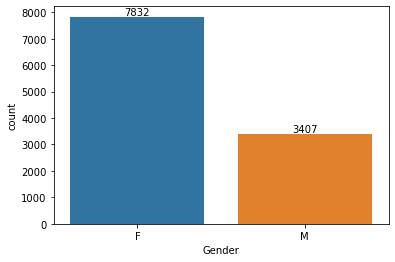

In [11]:
#Gender wise customer count

ab = sns.countplot(x='Gender', data= df)
for bars in ab.containers:
    ab.bar_label(bars)

In [12]:
df.groupby(['Gender'],as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

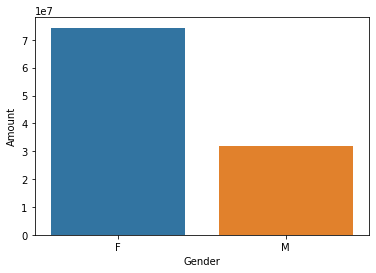

In [13]:
# Sales by Gender

sales_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum()
sns.barplot(x='Gender',y='Amount',data=sales_gender)

#### From above graph we can see that most of the buyers are females.

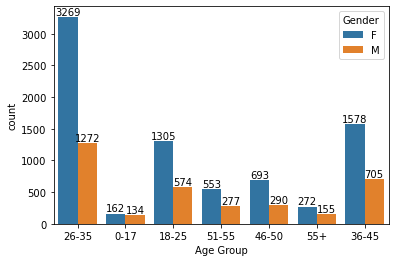

In [14]:
ac = sns.countplot(x='Age Group', data=df,hue='Gender')
for bars in ac.containers:
    ac.bar_label(bars)
    

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

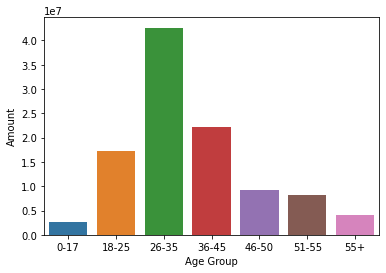

In [15]:
#Sales by Age_Group

sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum()
sns.barplot(x='Age Group',y='Amount',data=sales_age)

##### From above data we can say that most are the customers between age group 26-35

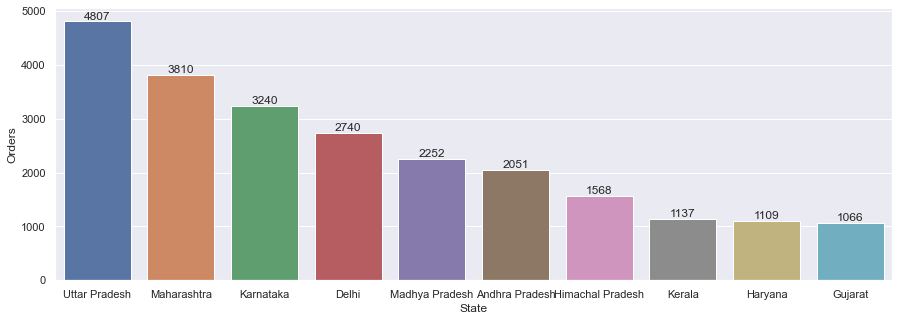

In [16]:
# Total number of order from top 10 states

orders_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ad =sns.barplot(x='State',y='Orders',data=orders_state)

for bars in ad.containers:
    ad.bar_label(bars)
    

##### From above graph we can say that most of the orders are from Uttar Pradesh then Maharashtra and Karnataka.

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

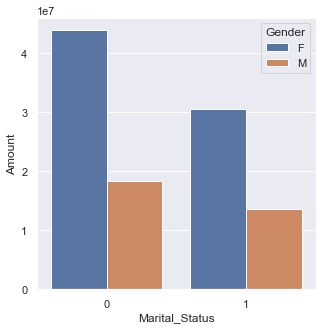

In [17]:
# Sales by Marrital status

sales_Mstatus= df.groupby(['Gender','Marital_Status'],as_index=False)['Amount'].sum()

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_Mstatus, hue='Gender')

##### From above graph we can say that most of the buyers are Unmarried women.

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

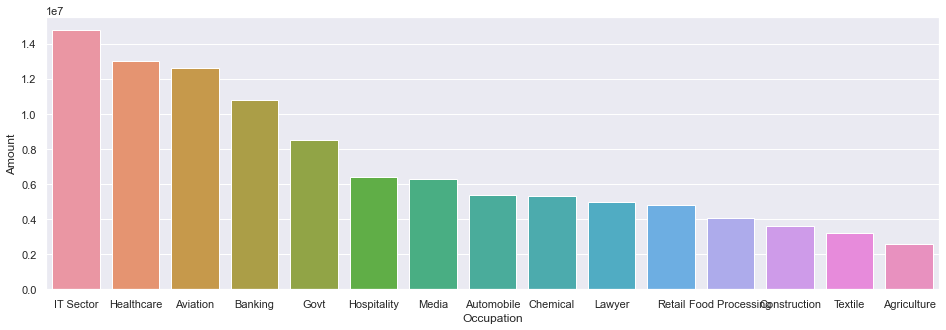

In [18]:
#Sales by Occupation

sales_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

##### From the above graph we can say that most of the buyers are working in  IT Sector, Healthcare and Aviation sector.

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

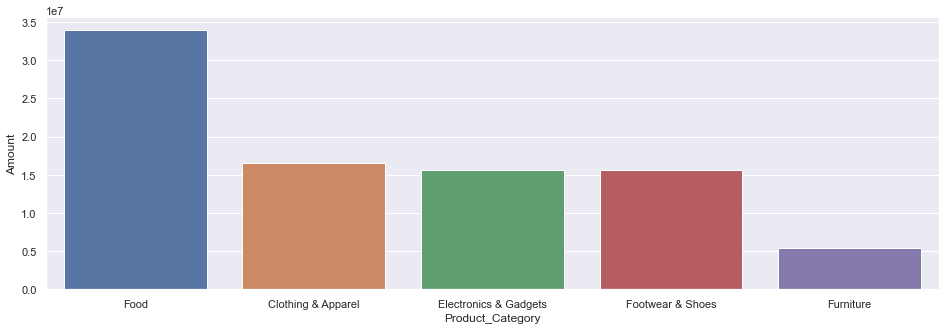

In [20]:
# Top 5 product Sales

sales_product= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.barplot(x='Product_Category', y='Amount',data=sales_product)

##### These 5 are top selling categories from the dataframe.

# Conclusion :

##### From the above analysis we Concluded that :
##### 1.Most of the buyers are females.
##### 2.Most of the customers age group between 26-35.
##### 3.Most of the buyers are Unmarried women.
##### 4. Most of the buyers are working in  IT Sector, Healthcare and Aviation sector.
##### 5. The top Selling product categories are Food, Clothing & Apparel, Electronics & Gadgets, Footwear & Shoes and Furniture.
